# Visualization 05 사례분석 100대 광고주

<img src="http://matplotlib.org/_static/logo2.svg" style="float:left;width:320px"/>

### 패스트캠퍼스 [금융데이터분석 입문]
#### 이승준 fb.com/plusjune

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


## 광고 통계 홈
* http://www.ad.co.kr/stat/index.hjsp

## 100대 광고주 (2012년, 2013년)
* https://gist.github.com/financedata/184a03c19ebfb55fcd70 
* shorten: https://goo.gl/yWMrcW



In [8]:
url = "https://goo.gl/6OfpGQ"
df = pd.read_csv(url)
df.head(20)

# month(날짜), corp(회사명), 시간(2012년, 2013년)이 섞여 있다

,month,corp,tv,radio,newspaper,magazine,mon-sum,mon-rank
0,2012-02,(주)대명레저산업,0,0,891260,88000,979260,75
1,2012-06,(주)대명레저산업,484103,0,788072,97250,1369425,74
2,2012-07,(주)대명레저산업,862823,0,1260625,84600,2208048,34
3,2012-08,(주)대방건설,212123,0,1036991,0,1249114,82
4,2012-09,(주)밀레,1223829,101779,381333,27750,1734691,51
5,2012-10,(주)밀레,1223829,101779,381333,27750,1734691,51
6,2012-11,(주)밀레,940695,130612,249754,30550,1351611,77
7,2012-12,(주)밀레,932722,120693,308121,28750,1390286,67
8,2013-04,(주)밀레,678541,0,371873,37250,1087665,96
9,2013-05,(주)밀레,662763,0,586635,27250,1276648,88


In [31]:
# 날짜는 part하고, month를 인덱스로 지정

url = "https://goo.gl/6OfpGQ"
df = pd.read_csv(url, parse_dates=True, index_col='month')
df.head()

,corp,tv,radio,newspaper,magazine,mon-sum,mon-rank
month,,,,,,,
2012-02-01,(주)대명레저산업,0,0,891260,88000,979260,75
2012-06-01,(주)대명레저산업,484103,0,788072,97250,1369425,74
2012-07-01,(주)대명레저산업,862823,0,1260625,84600,2208048,34
2012-08-01,(주)대방건설,212123,0,1036991,0,1249114,82
2012-09-01,(주)밀레,1223829,101779,381333,27750,1734691,51


In [34]:
# 2013년만 추출

df = df.loc['2013-01-01':'2013-12-31']
df.head()

,corp,tv,radio,newspaper,magazine,mon-sum,mon-rank
month,,,,,,,
2013-04-01,(주)밀레,678541,0,371873,37250,1087665,96
2013-05-01,(주)밀레,662763,0,586635,27250,1276648,88
2013-02-01,(주)팔도,833903,0,0,0,833903,87
2013-02-01,20세기폭스사,737001,0,162886,25000,924887,78
2013-01-01,경동나비엔,1351426,68990,0,0,1420416,51


## DataFrame.groupby 예제

In [35]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [36]:
# corp(회사명)
df = df.groupby("corp").sum()

# 불필요한 컬럼을 삭제
del df['mon-rank']

In [37]:
# 
df.head()

,tv,radio,newspaper,magazine,mon-sum
corp,,,,,
(주)밀레,1341304,0,958508,64500,2364313
(주)팔도,833903,0,0,0,833903
20세기폭스사,737001,0,162886,25000,924887
AIG손해보험,2649447,110362,4430131,4000,7193939
AXA다이렉트,4184037,187083,26418,0,4397538


In [38]:
df = df.sort_values(by='mon-sum', ascending=False)
df.head(10)

,tv,radio,newspaper,magazine,mon-sum
corp,,,,,
삼성전자,48285257,1722479,29146729,1892800,81047264
SK텔레콤,29410748,945209,11690260,99800,42146017
현대자동차,28526744,1983420,10149073,930000,41589236
LG전자,24977588,1155587,10568748,625150,37327072
KT,27802916,745012,4081864,160700,32790492
LGU플러스,26793000,1268837,1032656,8300,29102793
동서식품,20852232,479617,2594594,383800,24310243
아모레퍼시픽,9118006,548078,6036988,7210500,22913571
라이나생명보험,8312868,124371,12778573,39000,21254813


In [43]:
import matplotlib.font_manager as fm
fp = fm.FontProperties(fname="fonts/MalgunGothic.ttf")

In [44]:
df = df[['tv', 'radio', 'newspaper', 'magazine']] 
df.head()

,tv,radio,newspaper,magazine
corp,,,,
삼성전자,48285257,1722479,29146729,1892800
SK텔레콤,29410748,945209,11690260,99800
현대자동차,28526744,1983420,10149073,930000
LG전자,24977588,1155587,10568748,625150
KT,27802916,745012,4081864,160700


In [45]:
df = df[:20]  # 상위 20개사

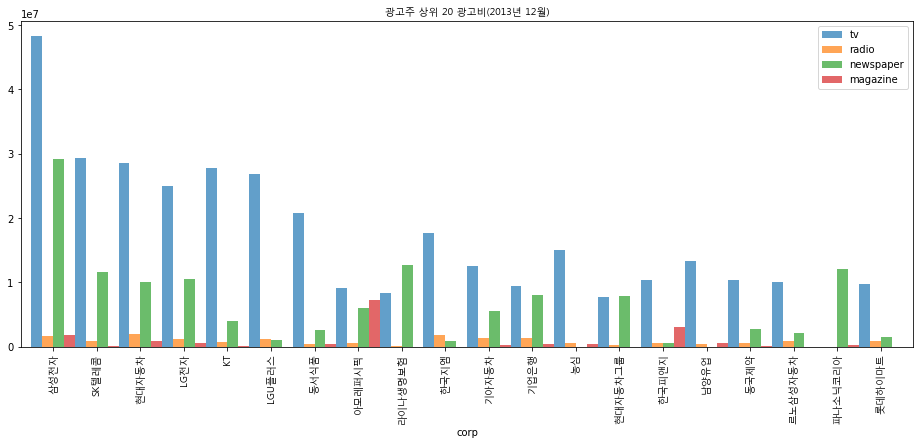

In [46]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title("광고주 상위 20 광고비(2013년 12월)", fontproperties=fp)
ax.set_xticklabels(df.index, fontproperties=fp)

df.plot(x=df.index, kind='bar', width=1, stacked=False, ax=ax, alpha=0.7)

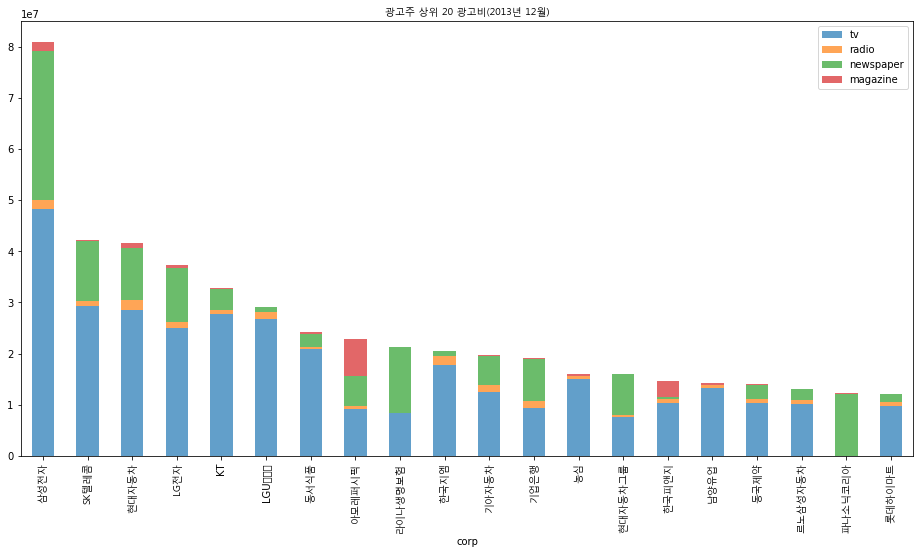

In [47]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title("광고주 상위 20 광고비(2013년 12월)", fontproperties=fp)
ax.set_xticklabels(df2.index, fontproperties=fp)

df.plot(x=df.index, kind='bar', stacked=True, ax=ax, alpha=0.7)

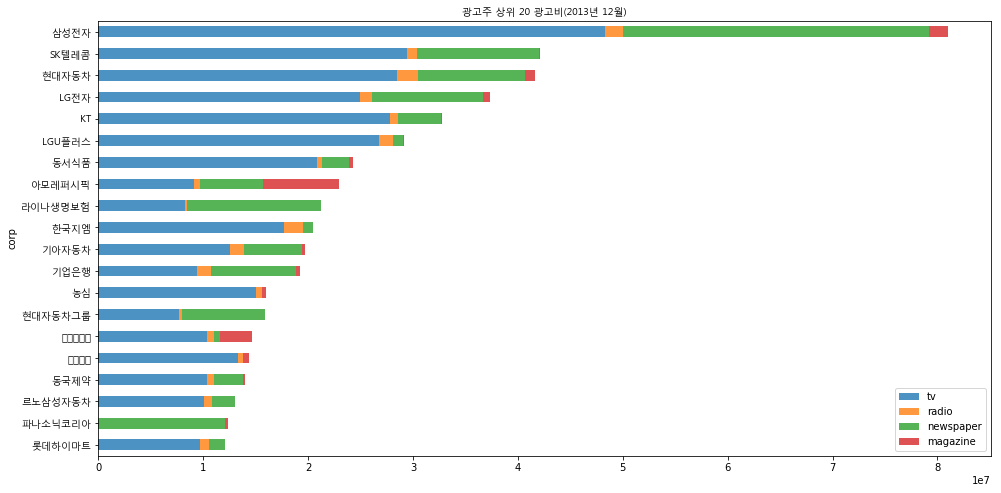

In [48]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title(u"광고주 상위 20 광고비(2013년 12월)", fontproperties=fp)
ax.set_yticklabels(df2.index, fontproperties=fp)

df[::-1].plot(x=df.index[::-1], kind='barh', stacked=True, ax=ax, alpha=0.8)

* df[::-1] y축의 순서를 뒤집어 그린다. (상위가 위에 오도록한다. 결과적으로 삼성전자가 가장 위쪽에 그려졌다)
* df[0:10][::-1] 상위 10개사를 뽑아, 순서를 뒤집는다.


## 정규화
* df.div(df.sum(axis=1), axis=0)

In [49]:
df = df.div(df.sum(1), axis=0)
df

,tv,radio,newspaper,magazine
corp,,,,
삼성전자,0.595767,0.021253,0.359626,0.023354
SK텔레콤,0.697830,0.022427,0.277375,0.002368
현대자동차,0.685917,0.047691,0.244031,0.022362
LG전자,0.669155,0.030958,0.283139,0.016748
KT,0.847896,0.022720,0.124483,0.004901
LGU플러스,0.920633,0.043598,0.035483,0.000285
동서식품,0.857755,0.019729,0.106728,0.015788
아모레퍼시픽,0.397930,0.023919,0.263468,0.314682
라이나생명보험,0.391105,0.005851,0.601208,0.001835


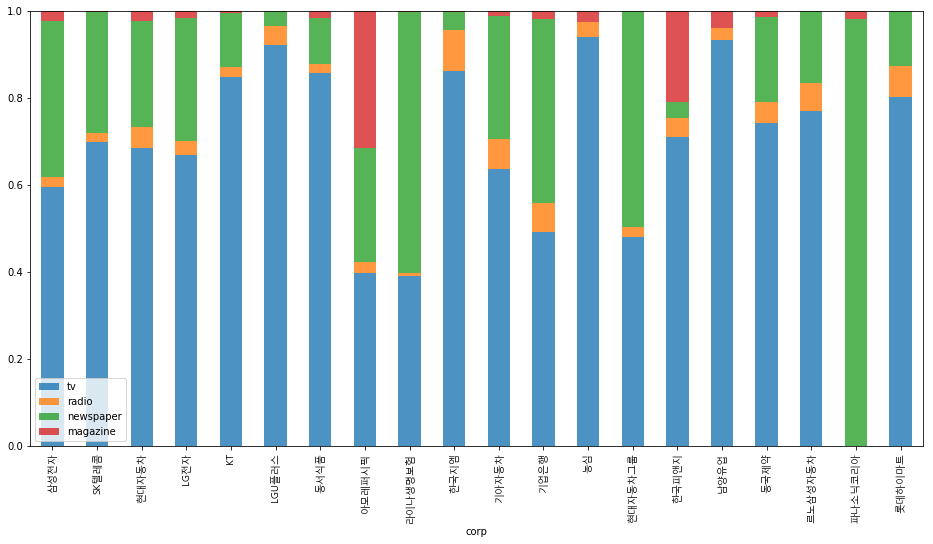

In [50]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xticklabels(df.index, fontproperties=fp) #한글 폰트 지정

df.plot(kind='bar', stacked=True, ax=ax, ylim=(0,1), alpha=0.8)